In [1]:
# importing the important library
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import numpy as np

In [4]:
df = pd.read_csv("Walmart.csv")

In [5]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [6]:
df.drop(['rating','time'],axis=1, inplace=True)

In [7]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
payment_method     0
profit_margin      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   payment_method  10051 non-null  object 
 8   profit_margin   10051 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 706.8+ KB


In [9]:
df.describe()

,invoice_id,quantity,profit_margin
count,10051.000000,10020.000000,10051.000000
mean,5025.741220,2.353493,0.393791
std,2901.174372,1.602658,0.090669
min,1.000000,1.000000,0.180000
25%,2513.500000,1.000000,0.330000
50%,5026.000000,2.000000,0.330000
75%,7538.500000,3.000000,0.480000
max,10000.000000,10.000000,0.570000


In [10]:
df.dropna(inplace=True)

In [11]:
df.set_index(df.columns[0], inplace=True)

In [12]:
df["unit_price"] = df["unit_price"].str.replace("$", "").astype(float)

In [13]:
df["unit_price"] = df["unit_price"].fillna(df["unit_price"].mean())
df["quantity"] = df["quantity"].fillna(df["quantity"].mean())

In [14]:
df.isnull().sum()

Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
payment_method    0
profit_margin     0
dtype: int64

In [15]:
import datetime

In [16]:
df["date"] = pd.to_datetime(df["date"], errors='coerce').dt.normalize()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4288\3230088804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors='coerce').dt.normalize()


In [17]:
df.columns

Index(['Branch', 'City', 'category', 'unit_price', 'quantity', 'date',
       'payment_method', 'profit_margin'],
      dtype='object')

Feature engineering

In [18]:
df["category"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [19]:
df['Total_sale'] = df['unit_price'] * df['quantity']

In [20]:
df.head(3)

,Branch,City,category,unit_price,quantity,date,payment_method,profit_margin,Total_sale
invoice_id,,,,,,,,,
1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,Ewallet,0.48,522.83
2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,Cash,0.48,76.40
3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,Credit card,0.33,324.31


In [21]:
df["Actual_profit"] = df["Total_sale"]*df["profit_margin"]

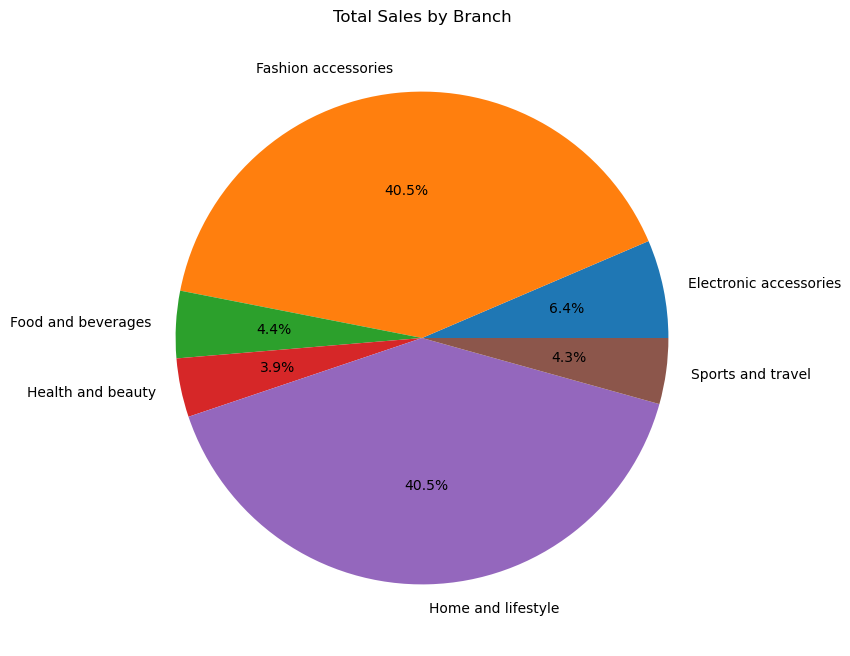

In [22]:
# contribution of ech category in the sales
category_sales = df.groupby('category')['Total_sale'].sum()

# Plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')

plt.title("Total Sales by Branch")
plt.show()

In [23]:
df['year'] = df["date"].dt.year

In [24]:
yearly_sale = df.groupby('year')['Total_sale'].sum().sort_values(ascending=False)

yearly_sale

year
2019    307587.38
2021    235132.00
2023    233319.00
2020    220486.00
2022    218301.00
Name: Total_sale, dtype: float64

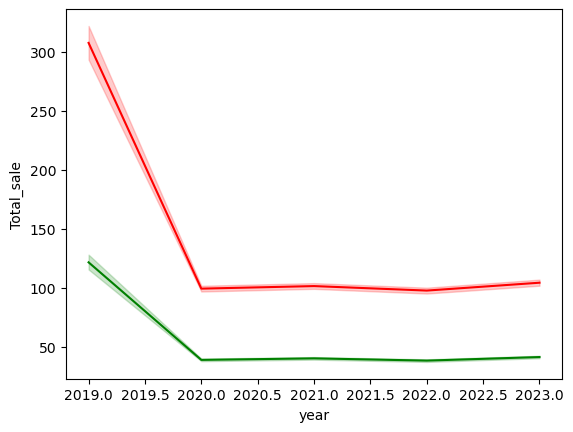

In [25]:
# Actual profit and total_sales distribution
sns.lineplot(df, x= "year", y = 'Total_sale', color='Red')
sns.lineplot(df, x= "year", y = 'Actual_profit', color='green')
plt.show()

In [26]:
# branch wise sale here is the 5 highest banch
df.groupby(["Branch"])['Total_sale'].sum().sort_values(ascending=False).head()

Branch
WALM074    25732.42
WALM009    25712.34
WALM003    25001.56
WALM030    24690.60
WALM058    24650.37
Name: Total_sale, dtype: float64

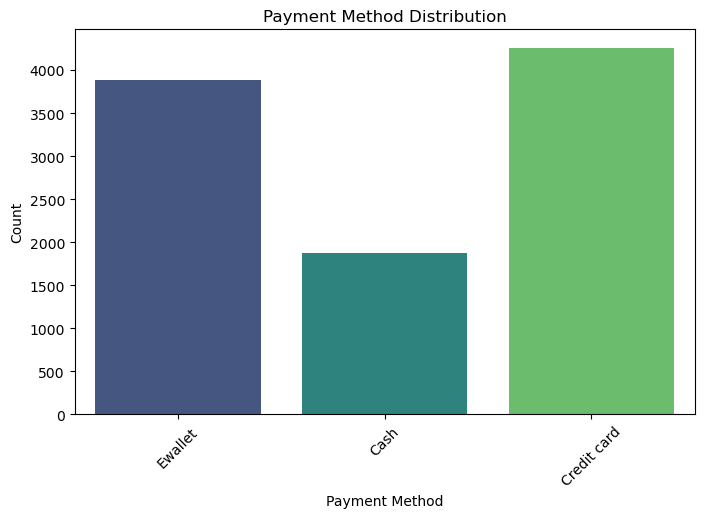

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['payment_method'], palette='viridis')

plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [30]:
!pip install pyodbc

In [31]:
!pip install pyodbc

In [33]:
import pyodbc

conn = pyodbc.connect(
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=DESKTOP-4NBOQ9L\SQLEXPRESS;"
    r"DATABASE=Project;"
    r"Trusted_Connection=yes;"
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM walmart_data")
rows = cursor.fetchall()

for row in rows:
    print(row)

conn.close()


('WALM003', 'San Antonio', 'Health and beauty', 74.69000244140625, 7.0, datetime.date(2019, 5, 1), 'Ewallet', datetime.time(0, 48), 522.8300170898438, 250.95840454101562, 2019)
('WALM048', 'Harlingen', 'Electronic accessories', 15.279999732971191, 5.0, datetime.date(2019, 8, 3), 'Cash', datetime.time(0, 48), 76.4000015258789, 36.672000885009766, 2019)
('WALM067', 'Haltom City', 'Home and lifestyle', 46.33000183105469, 7.0, datetime.date(2019, 3, 3), 'Credit card', datetime.time(0, 33), 324.30999755859375, 107.02230072021484, 2019)
('WALM064', 'Bedford', 'Health and beauty', 58.220001220703125, 8.0, datetime.date(2019, 1, 27), 'Ewallet', datetime.time(0, 33), 465.760009765625, 153.7008056640625, 2019)
('WALM013', 'Irving', 'Sports and travel', 86.30999755859375, 7.0, datetime.date(2019, 8, 2), 'Ewallet', datetime.time(0, 48), 604.1699829101562, 290.0015869140625, 2019)
('WALM026', 'Denton', 'Electronic accessories', 85.38999938964844, 7.0, datetime.date(2019, 3, 25), 'Ewallet', datetime